> By Jiahui Tang

**Spec**:

* OS: AWS VM Ubuntu 18.04 
* Cluster: (x2.2large) * 2 instances
  * Latency: 
             rtt min/avg/max/mdev = 0.349/0.479/2.914/0.239 ms
             
  * Bandwidth: 
             Amazon says it’s 5 Gbps
* Compiler: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0


* More details below:

Network Latency:
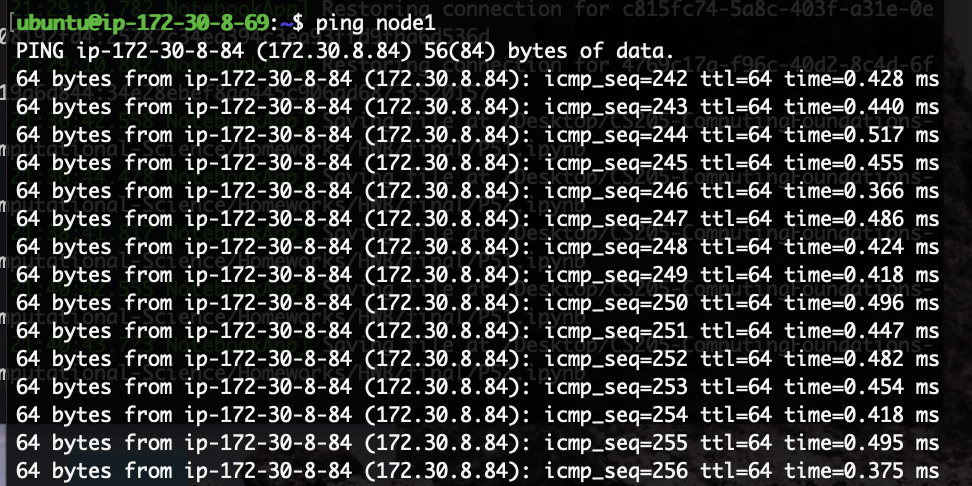
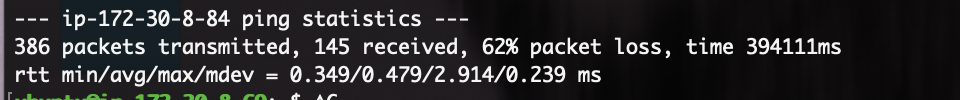

Kernel Version:
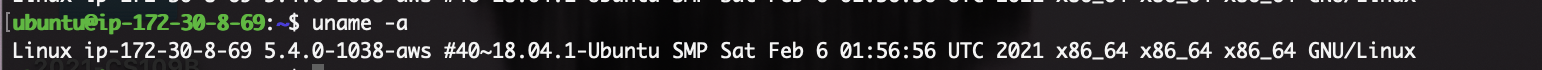

MPI Version:
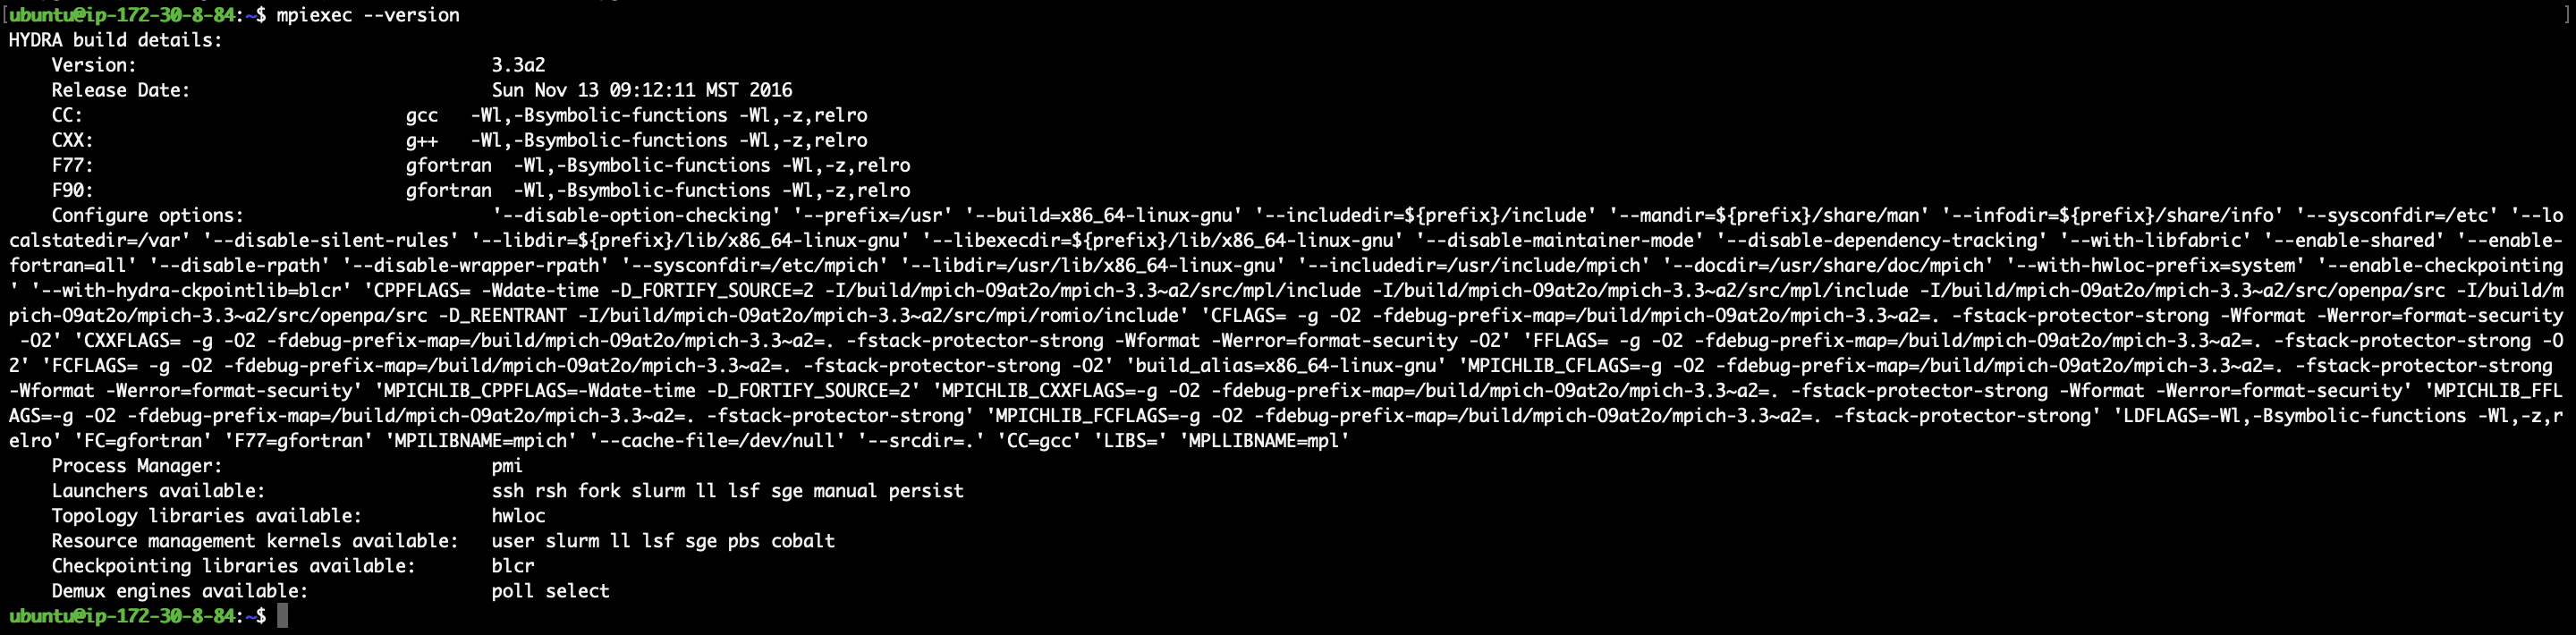

CPU Info:
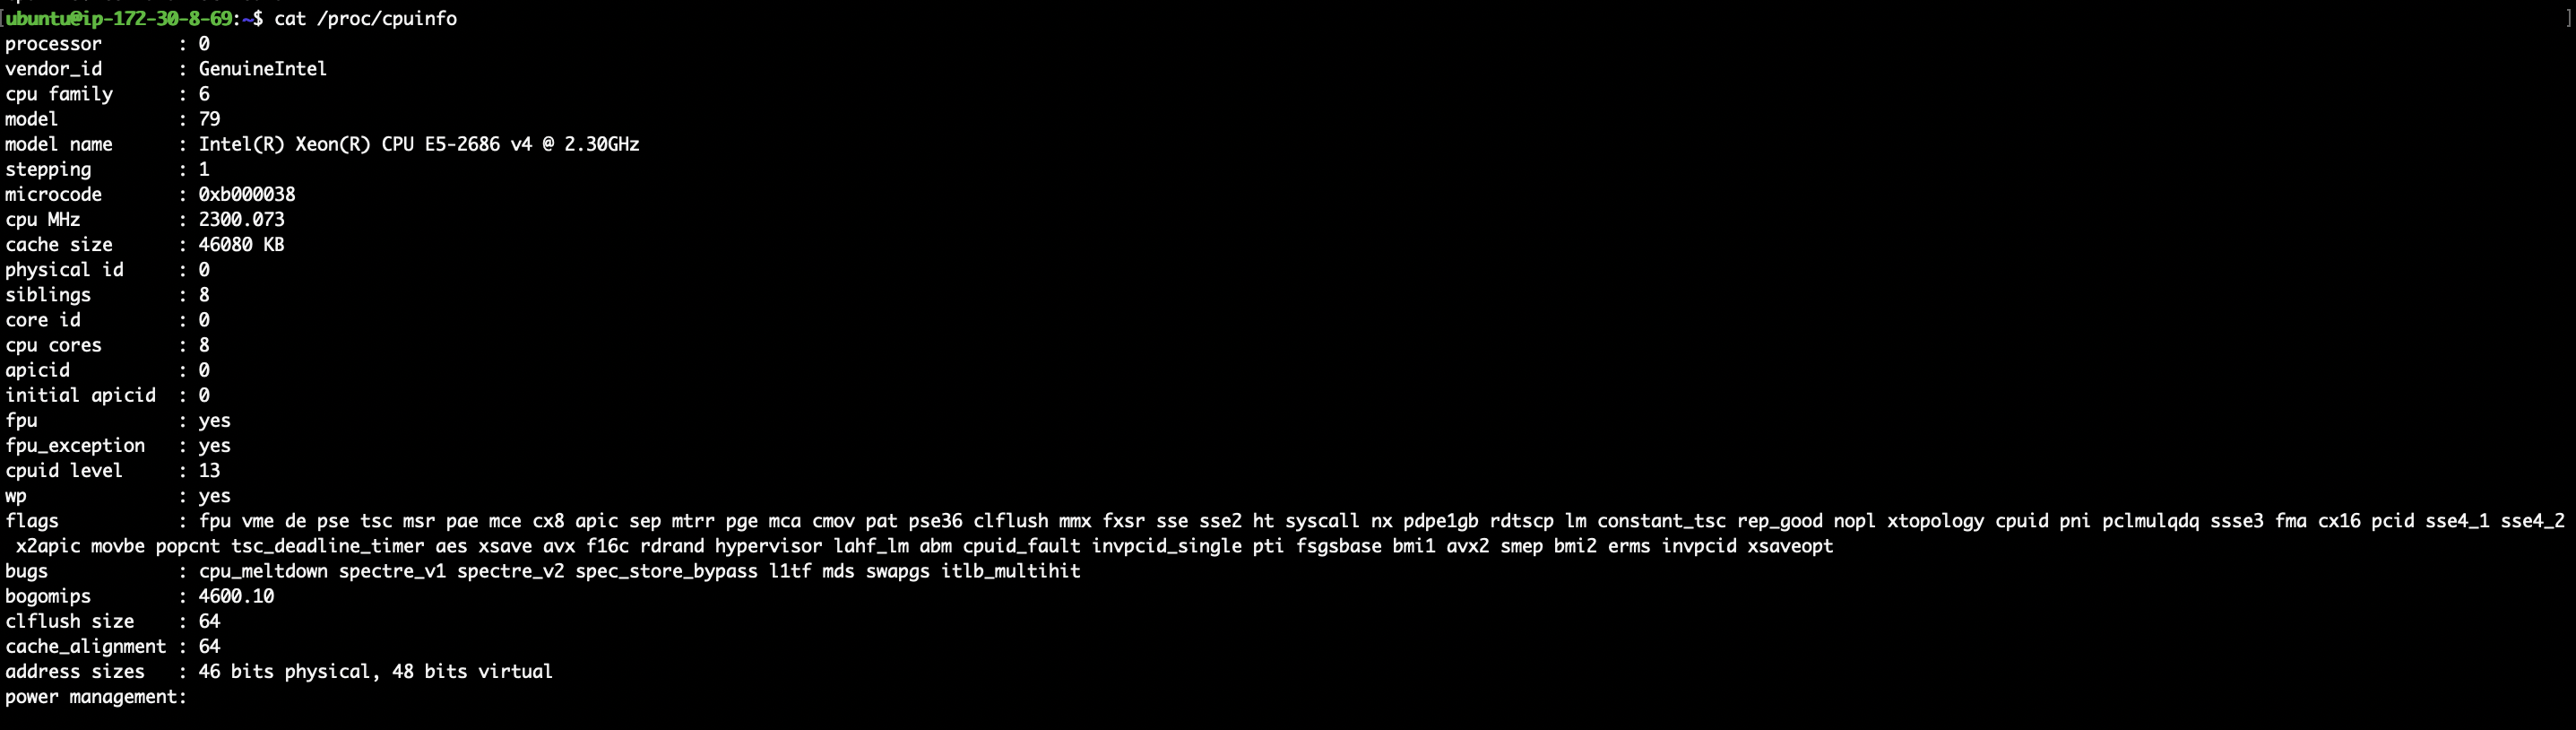
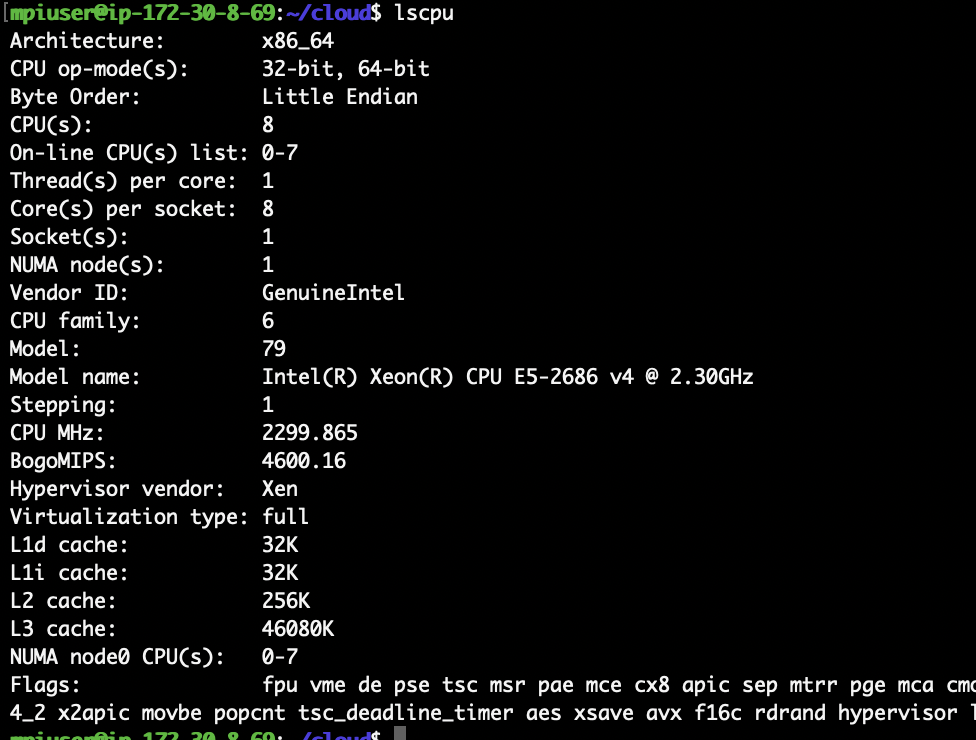

Compiler: 
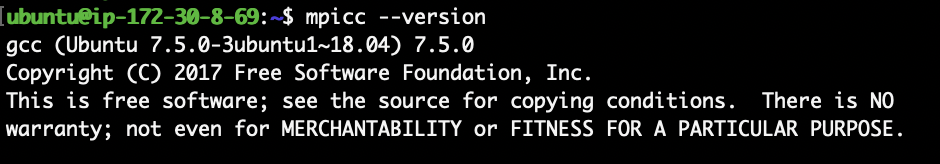

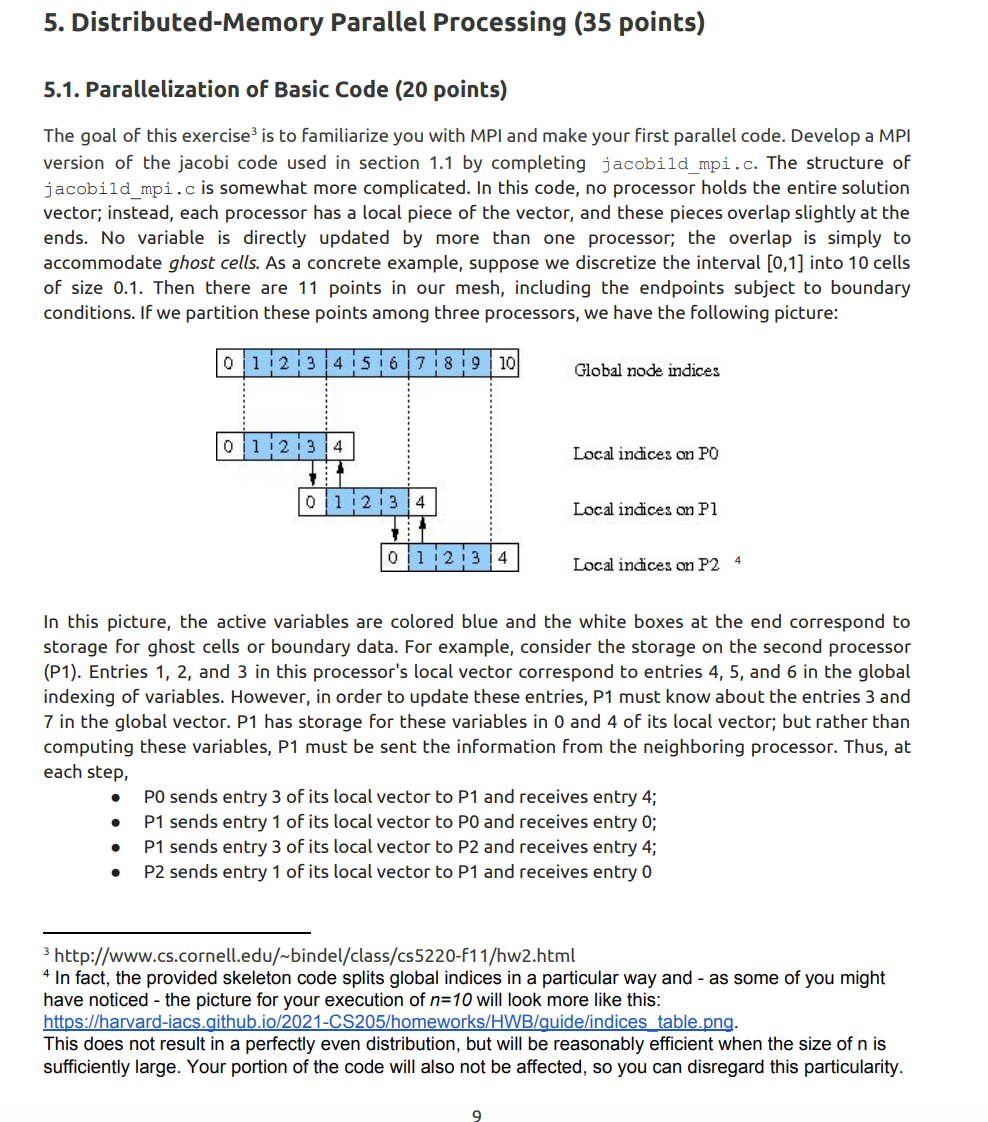
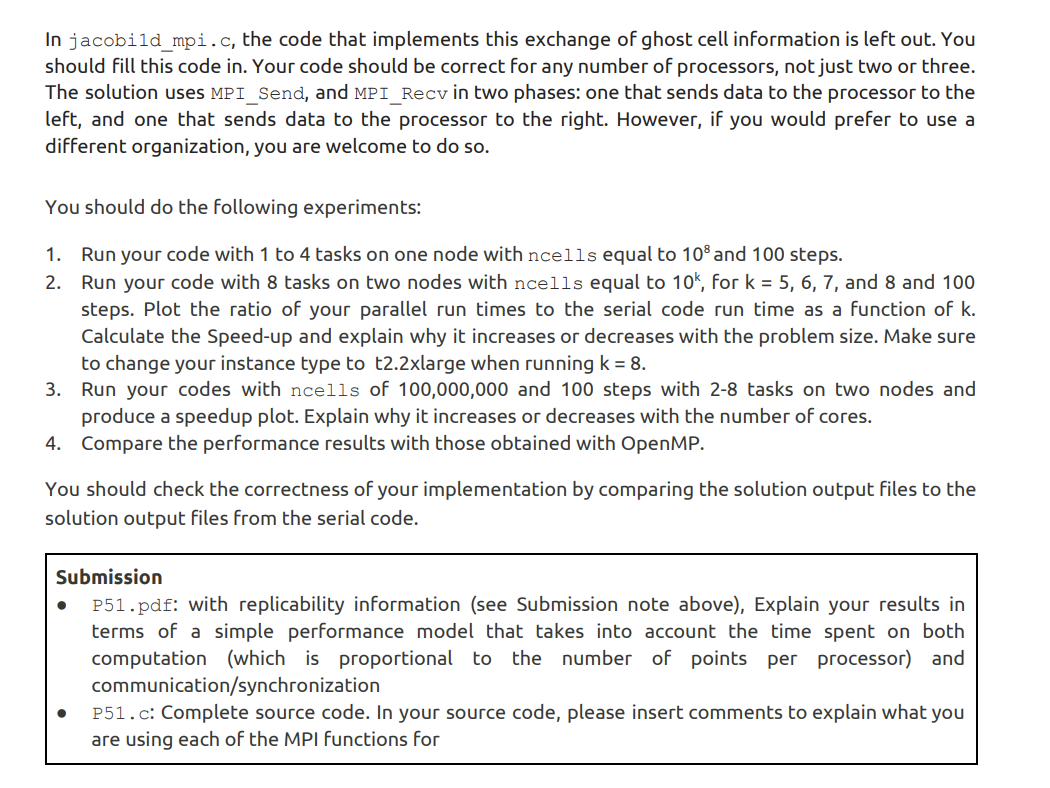

**(5.1.1)**

With `ncells = 10^8`, `step=100`, `1 node`

*Unit: Seconds*
 
|Number of Processes   |1 | 2 | 3 |4| 
| -----------| ----------- |----------- |----------- |----------- 
| One Node |48.328|24.0397 |16.0932|12.0808|


### Discussion:
On one node, the performance increases and time decreases as number of tasks increase. This is similar to what we discussed in question 4, as more processor task per node allow more concurrency when shared same memory, that could simultaneously execute statements in the parallel region.


**Reference**:
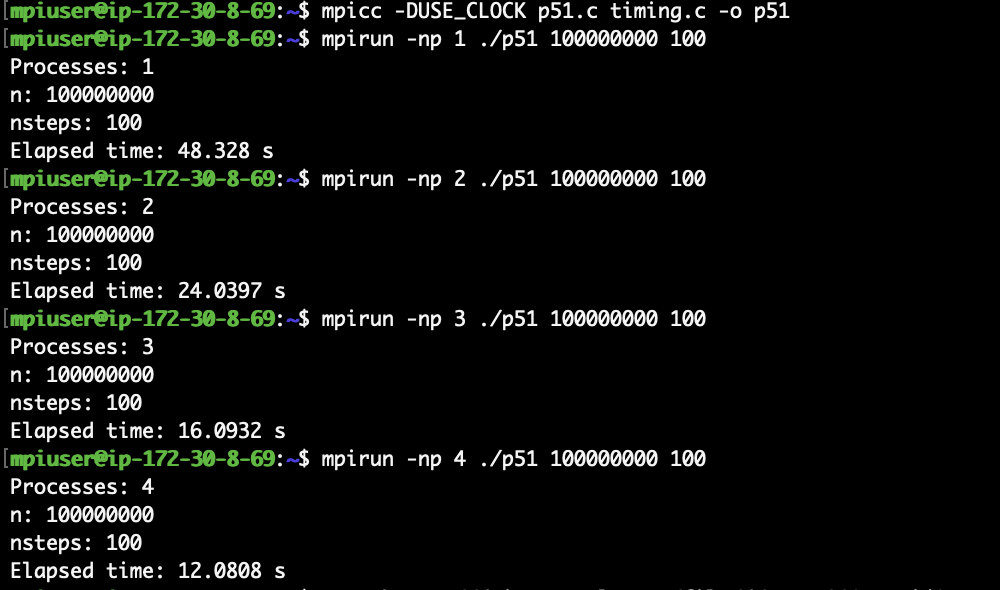

**(5.1.2)**. Table for improvements in elapsed execution time 

(*unit: seconds*)

With `ncells = 10^k`, `step=100`, `-np 8`

For serial code runtime, it has 8 different tasks and 8 elapsed time, I will take an average time for these 8 tasks.
For example, for serial code, when running on 8 task, it shows the below 8 elapsed time in attached screenshot. 
I would take an average and put `0.04383175` for `k=5 serial code elpased time`

|       | k=5 Elpased Time |k=6 Elpased Time |  k=7 Elpased Time | k=8 Elpased Time |
| ----------- | ----------- |----------- |----------- |----------- |
| Parallel Code Runtime |0.0244453|0.0734067|0.631309|6.07382|
| Serial Code Runtime |0.04383175|0.48234|4.79949|48.70995|
| **Ratio P/S** | 0.55788      |0.15219      |0.13153      |0.12469  |
| **Speedup S/P** | 1.79249      |6.57078   |7.60244      |8.01966 |


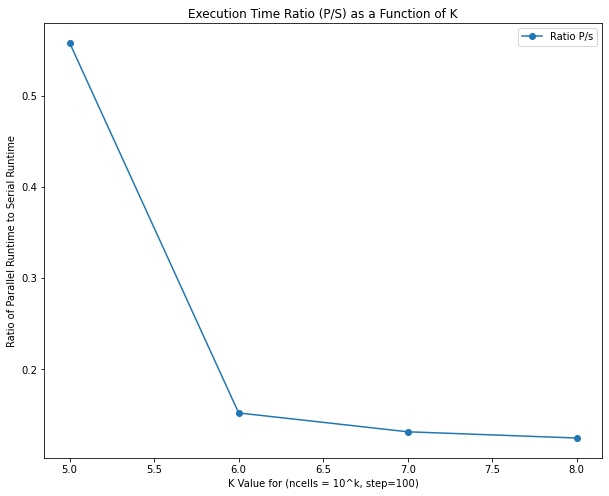

In [3]:
import matplotlib.pyplot as plt

k = [5,6,7,8]
ratio = [0.55788,0.15219,0.13153,0.12469]
speedup = [1.79249,6.57078,7.60244,8.01966]

plt.figure(figsize = (10,8))
plt.plot(k, ratio, '-ob', label = "Ratio P/s", color="tab:blue")
#plt.plot(k, speedup, '-ob', label = "Speedup S/P",color="tab:orange")

plt.xlabel('K Value for (ncells = 10^k, step=100)')
plt.ylabel('Ratio of Parallel Runtime to Serial Runtime')
plt.title('Execution Time Ratio (P/S) as a Function of K')
plt.legend()
plt.show()

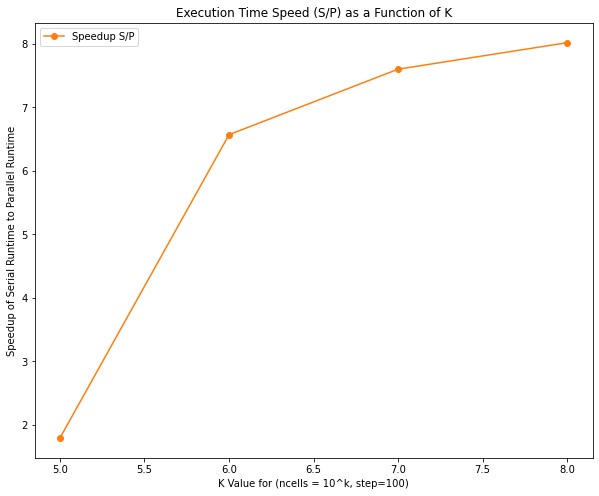

In [2]:
plt.figure(figsize = (10,8))
#plt.plot(k, ratio, '-ob', label = "Ratio P/s", color="tab:blue")
plt.plot(k, speedup, '-ob', label = "Speedup S/P",color="tab:orange")

plt.xlabel('K Value for (ncells = 10^k, step=100)')
plt.ylabel('Speedup of Serial Runtime to Parallel Runtime')
plt.title('Execution Time Speedup (S/P) as a Function of K')
plt.legend()
plt.show()

### Discussion:

> The speedup increases as K value increases, it shows when problem size increase, the speedup also increases. However it also suffer from a diminishing return with slower incremental and smaller marginal speedup when problem size gets larger. It eventually approaches 8, as there are 8 parallel tasks and the theortical maximum speedup is 8.

> Speedup increase with problem size because as we fixed number of thread, the overhead for synchronization and communication is roughly the same for all problem sizes. When K increases, the overheads will thus take a smaller and neglible proportion of overall runtime. Total runtime adds up the parallel time and overhead time, thus it will result in a higher and higher speedup.

> It also suffer from a diminishing marginal increments because as problem size goes up, the overhead time become insignificant. The speedup thus gradually approaches real speedup. 

> Also there's diminishing marginal incremental in speedup rate when problem size goes up, as `granularity= computation/communication ratio`, when fixing number of cores, changing problem size changes the computation portion of granularity. The granularity increased to a higher ratio, became `coarse-grained`, where relatively large amounts of computational work are done between communication/synchronization events. Thus, gradually, the load imbalance overhead may dominates overhead, and also lead to higher execution time. It slows down the acceleration of speedup, making the marginal increase became smaller as problem size goes up.

> Finally, the speedup follows Amdahl's Law, is defined by the fraction of code (c) that can be parallelized, and bounded by sequential code, even a small percentage of sequential code can greatly limit potential speedup. Because it has overhead, thus the speedup never reaches theory speedup but were approaching limit (here may also suffer from a bit of floating point errors).

**Reference:**

* MPI Parallel Code:
 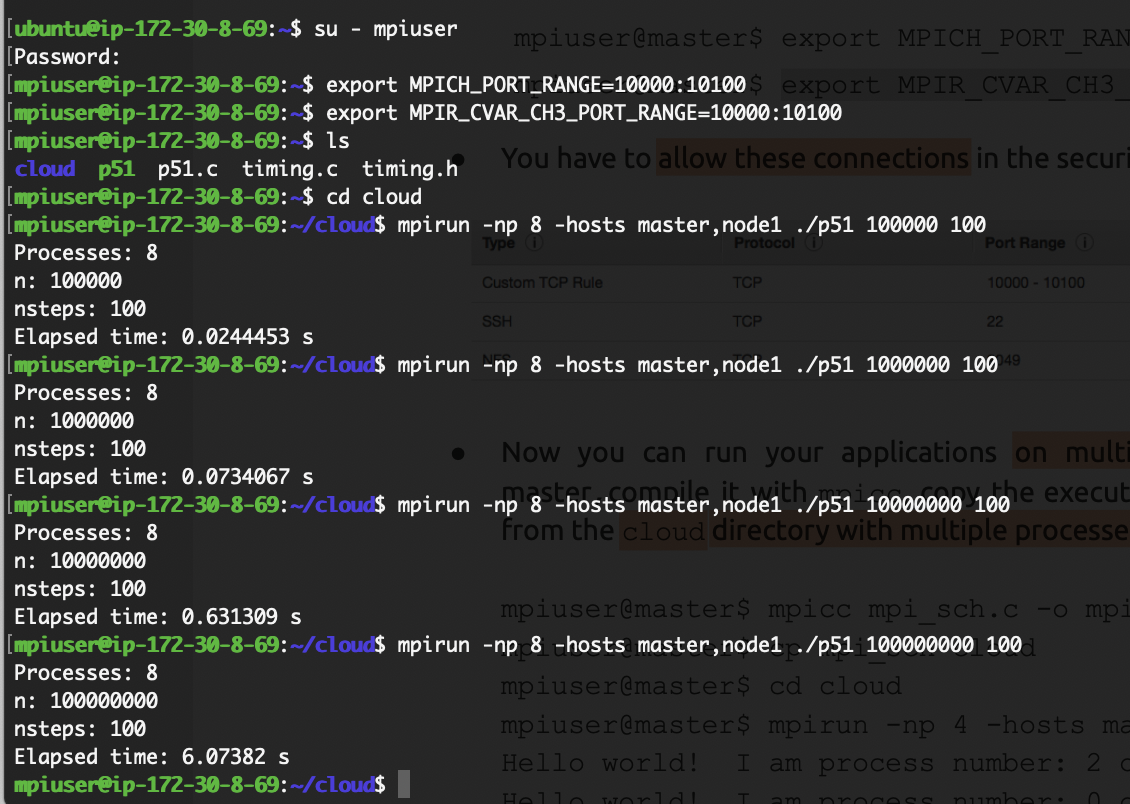

* Serial Code
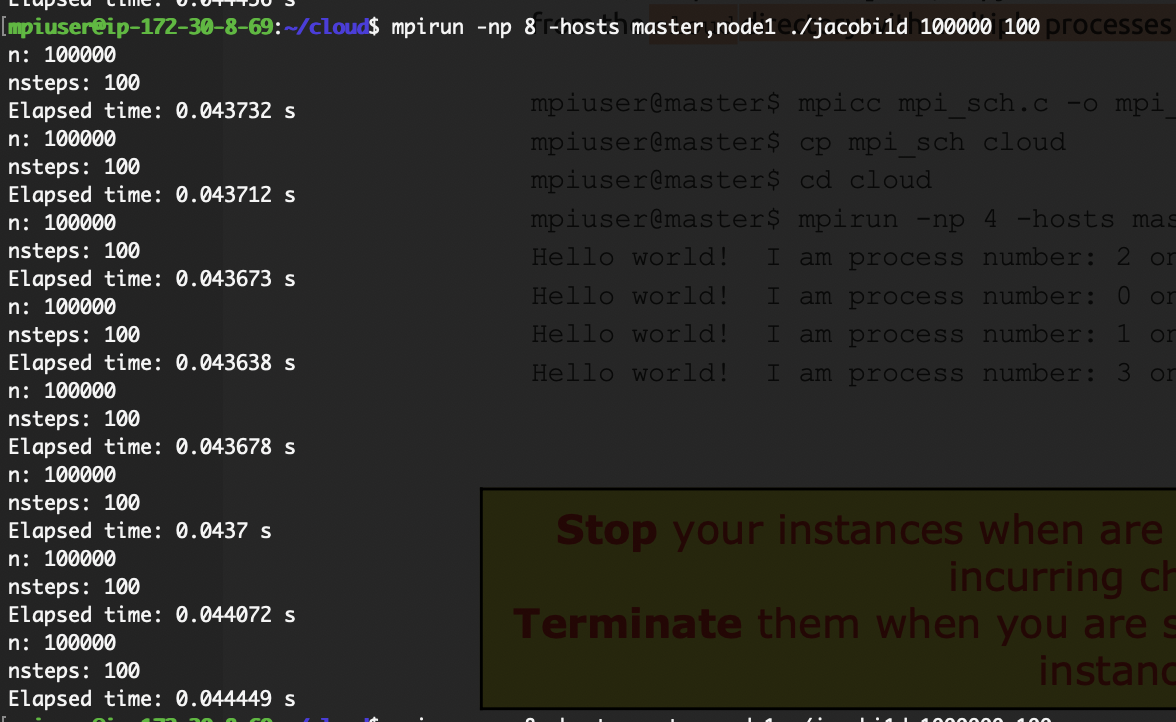

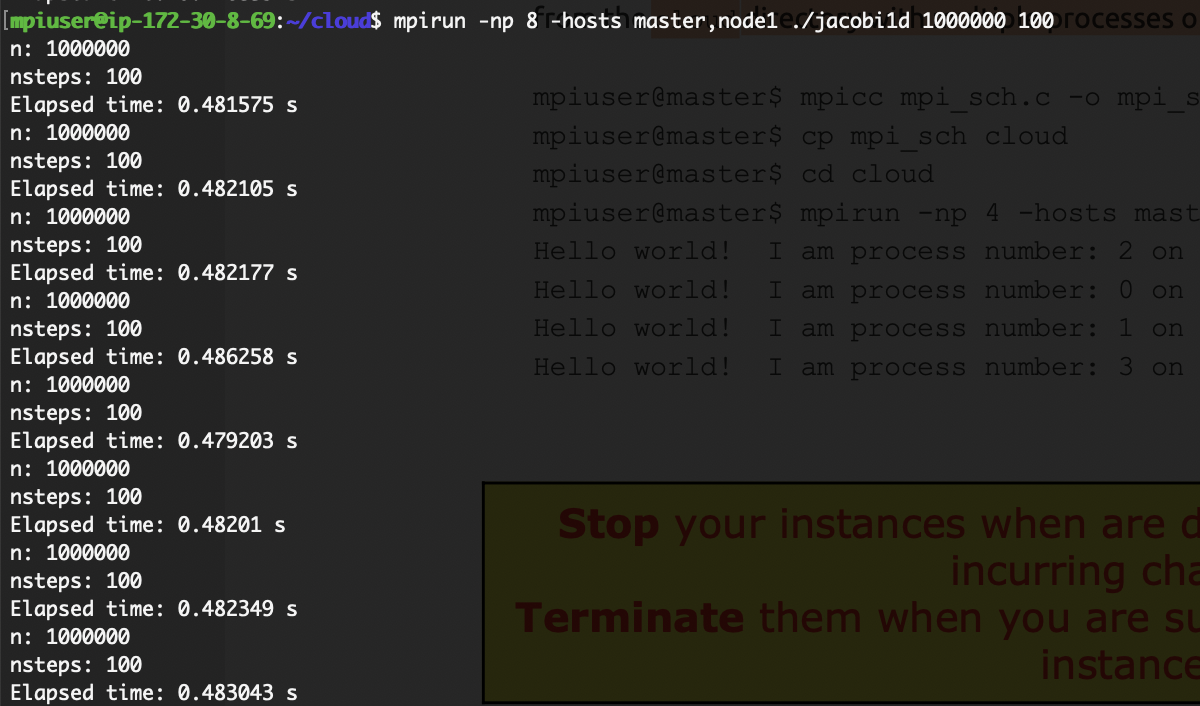
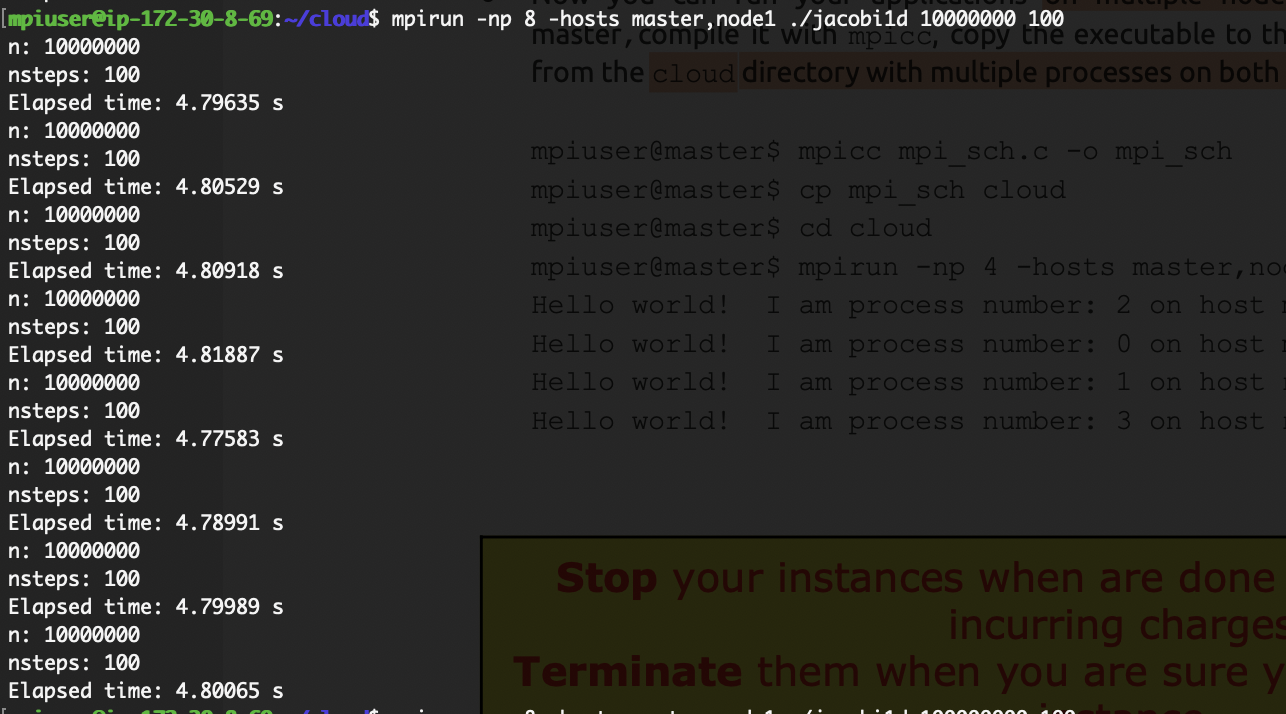
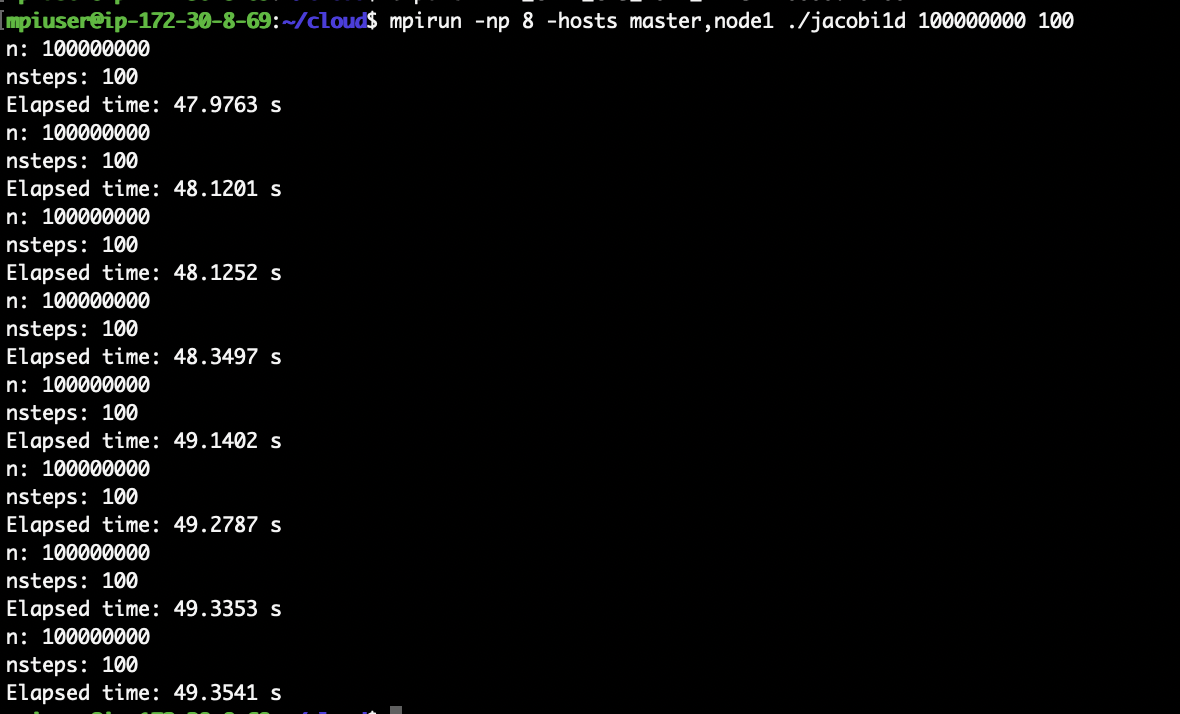

**(5.1.3)**. Table for improvements in elapsed execution time on two nodes with different tasks

(*unit: seconds*)

With `ncells = 10^8`, `step=100`, `2 nodes`

| np (number of tasks)   | -np 2 |-np 3| -np 4|-np 5|-np 6| -np 7|-np 8|
| ----------- | ----------- |----------- |----------- |----------- |----------- |----------- |----------- |
| Parallel Code Runtime |23.6753|16.1857|12.0332|9.67444|8.92306|6.99572|6.08274|
| Sequential Code Runtime | 48.19455       |47.8041       |47.55055        |48.0219   |48.47373    |48.45667      |48.6451 |
| **Ratio P/S** | 0.49124       |0.33858      |0.25306      |0.20145 |0.18408     |0.14437    |0.12504|
| **Speedup S/P** | 2.03565    |2.95348      |3.9516     |4.96379  |5.43241  |6.92662   |7.99723  |

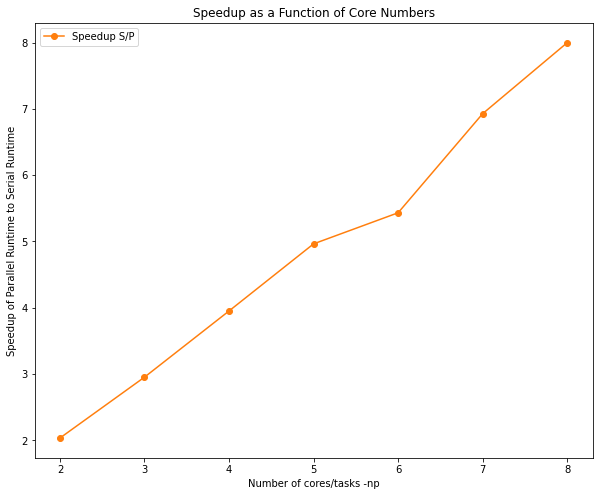

In [8]:
import matplotlib.pyplot as plt

k = [2,3,4,5,6,7,8]
ratio = [0.49124,0.33858,0.25306,0.20145,0.18408,0.14437,0.12504]
speedup = [2.03565,2.95348,3.9516,4.96379,5.43241,6.92662,7.99723]

plt.figure(figsize = (10,8))
#plt.plot(k, ratio, '-ob', label = "Ratio P/s", color="tab:blue")
plt.plot(k, speedup, '-ob', label = "Speedup S/P",color="tab:orange")

plt.xlabel("Number of cores/tasks -np" )
plt.ylabel('Speedup of Parallel Runtime to Serial Runtime')
plt.title('Speedup as a Function of Core Numbers')
plt.legend()
plt.show()

### Discussion:

> With all the other criteria hold same, as the number of cores/MPI tasks increase, the speedup value also increases linearly with it. It makes sense because when we are using MPI to distribute parallelized code into `n cores`, the maximum theortical speed up is thus `n`. More details is discussed below.

> P.S: The turning point at `6` here might be due to floating point errors, the overall trend is linear.

**5.1.4**.

### Discussion:

In **OpenMP**, which is shared memory parallel processing, the speedup become slower when core increases, the maximum speedup is around `3.4`.

However, in **MPI** with distributed memory and multiple cores, the maximum speedup increases linearly with number of cores, and could reach theortical value of `8`.

While we shouldn't compare the absolute value of elapsed time, because looking at serial runtime OpenMp version and MPI version display very different average time for all threads. One is around `48 sec` and the other is around `24 secs`.

Instead, I will compare speed up of these two parallel processing. 

For **MPI**, it uses 8 threads in 8 cores (as there are double node in a cluster), it is `1 thread/core`, meaning all threads are fully used concurrently. Thus, when number of cores increases, the linear increase of speedup is as expected.

For **OpenMP**, it uses 8 threads in 4 cores (Intel, single node), thus when `core > 4`, the overhead is increasing and obviously slows down speedup increment. 

It is mainly because CPU cache is allocated core-wise. And there will there be different memory distribution methods in OpenMP and MPI. Thus if there are two threads in one core, they will use the same memory cache and thus produce more communication and sychronization overhead. It results in slowing down of speedup and also couldn't reach theortical speedup of `4x` in OpenMP. However, in MPI, it is `1 thread/core`, and there will not be this problem, it could thus reach speed up of theortical `8x`.
Also for MPI, there is overhead for creating process for one time, where in OpenMP, the overhead depends on implementation threads, and can be created or joined for particularly task which add more overhead. Here for this problem, MPI have a better speedup.



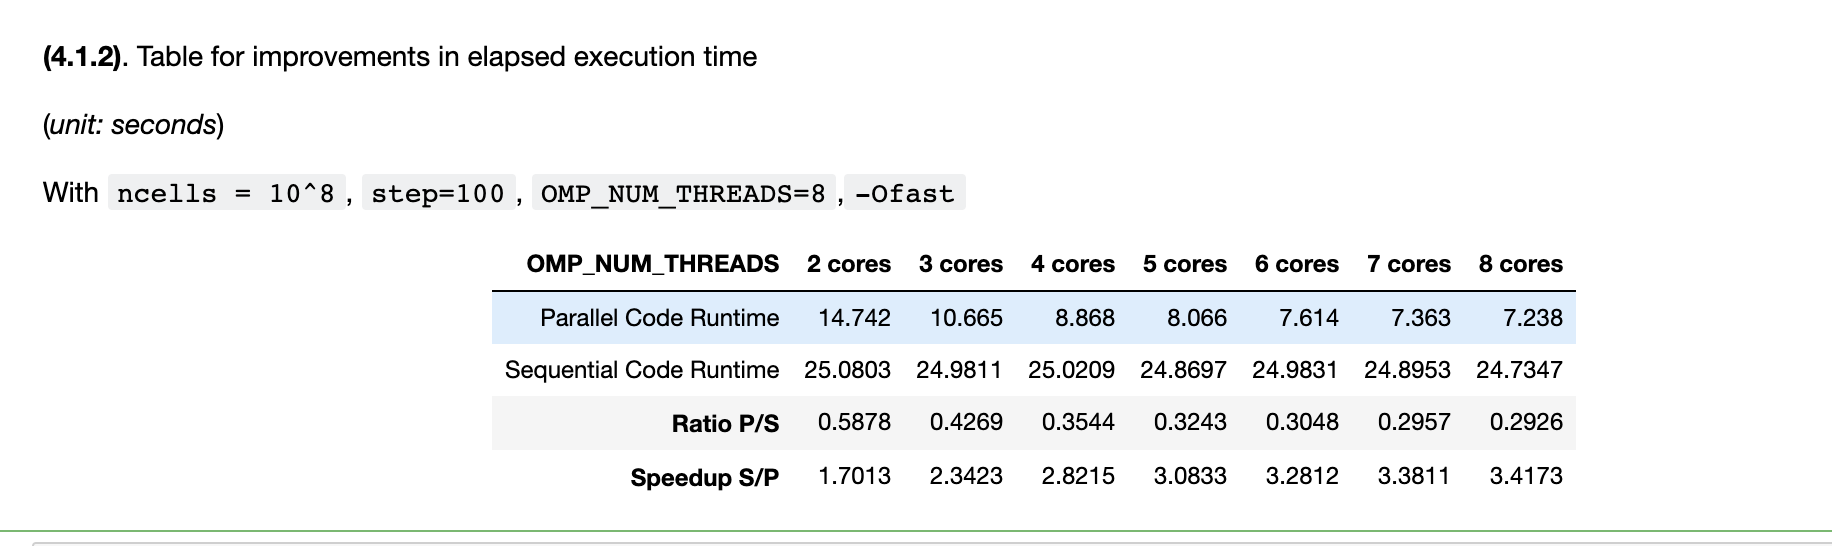

**Reference:** 
* Parallel:
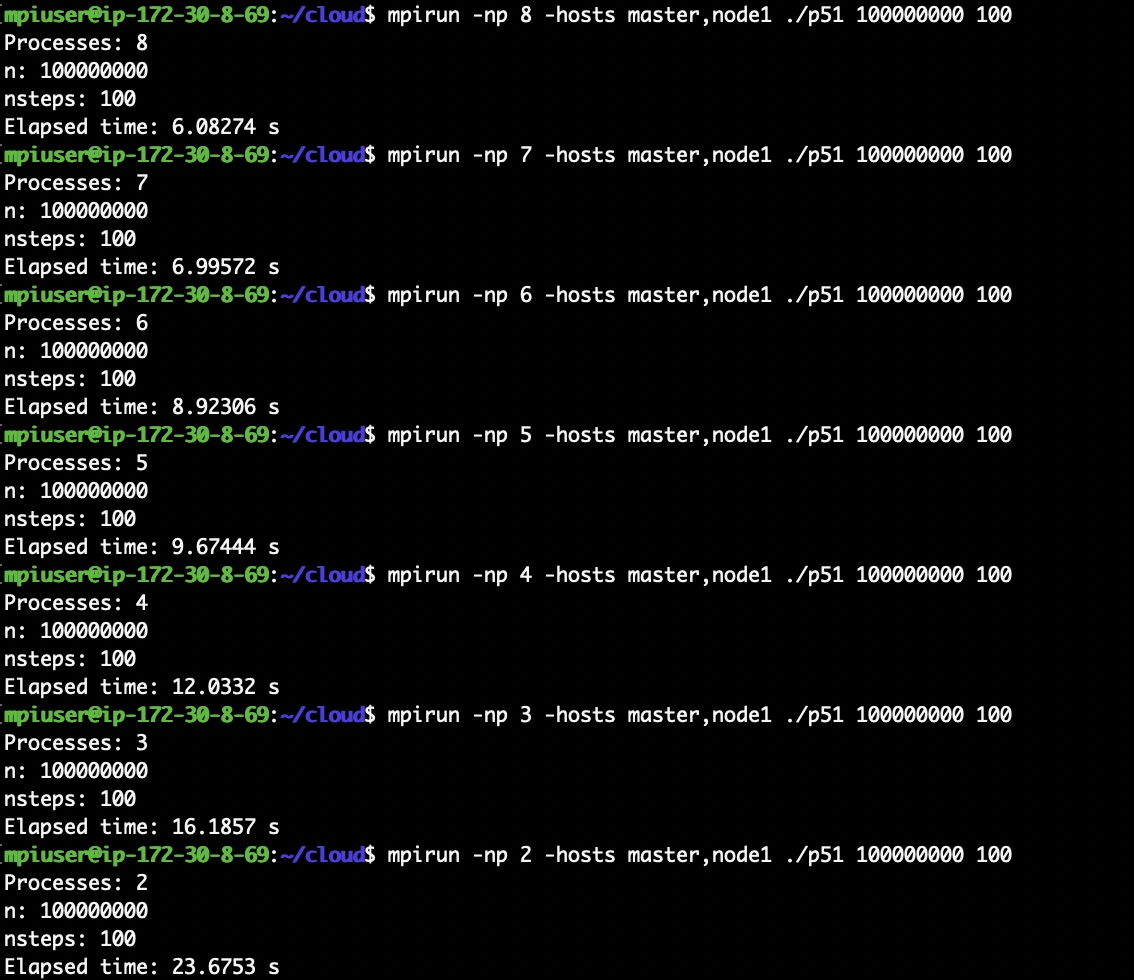

* Serial:
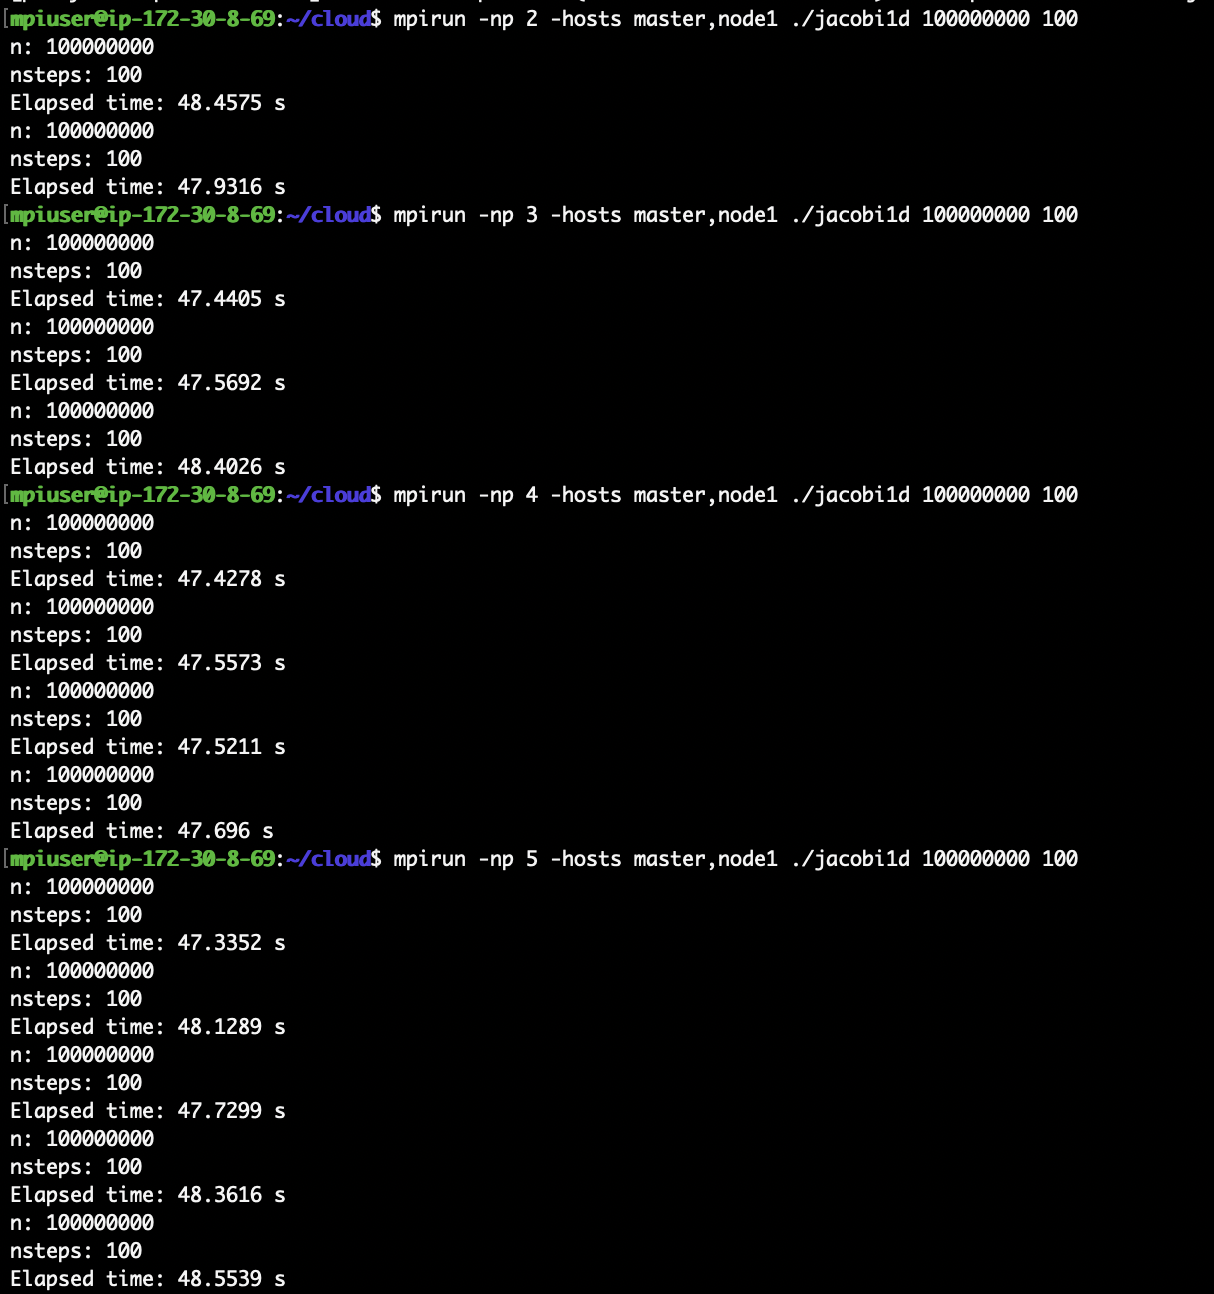

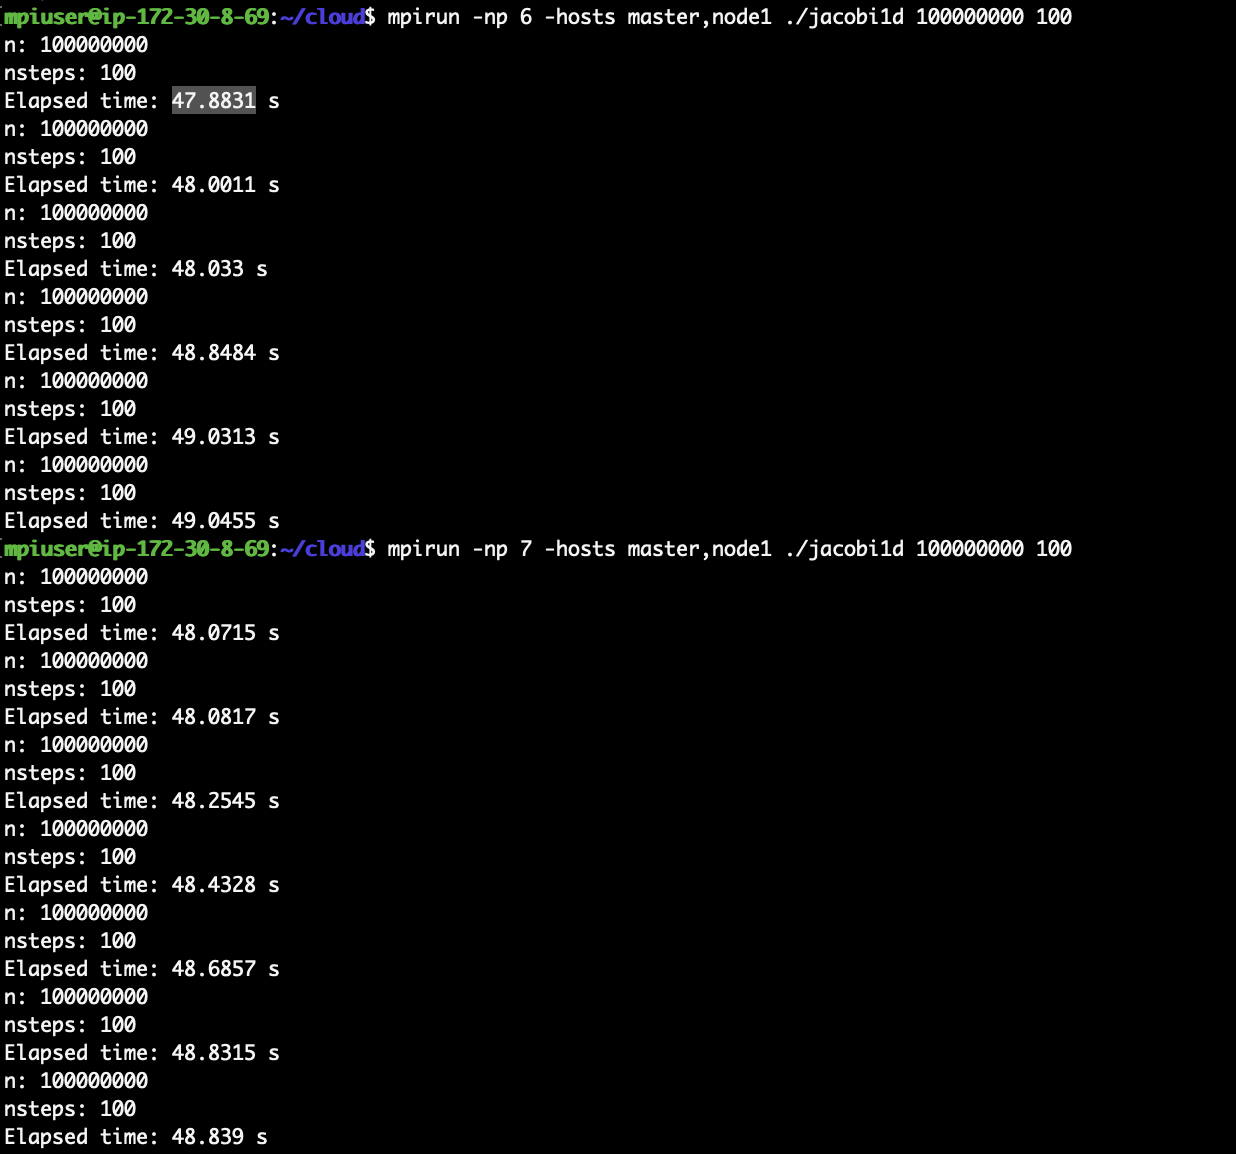

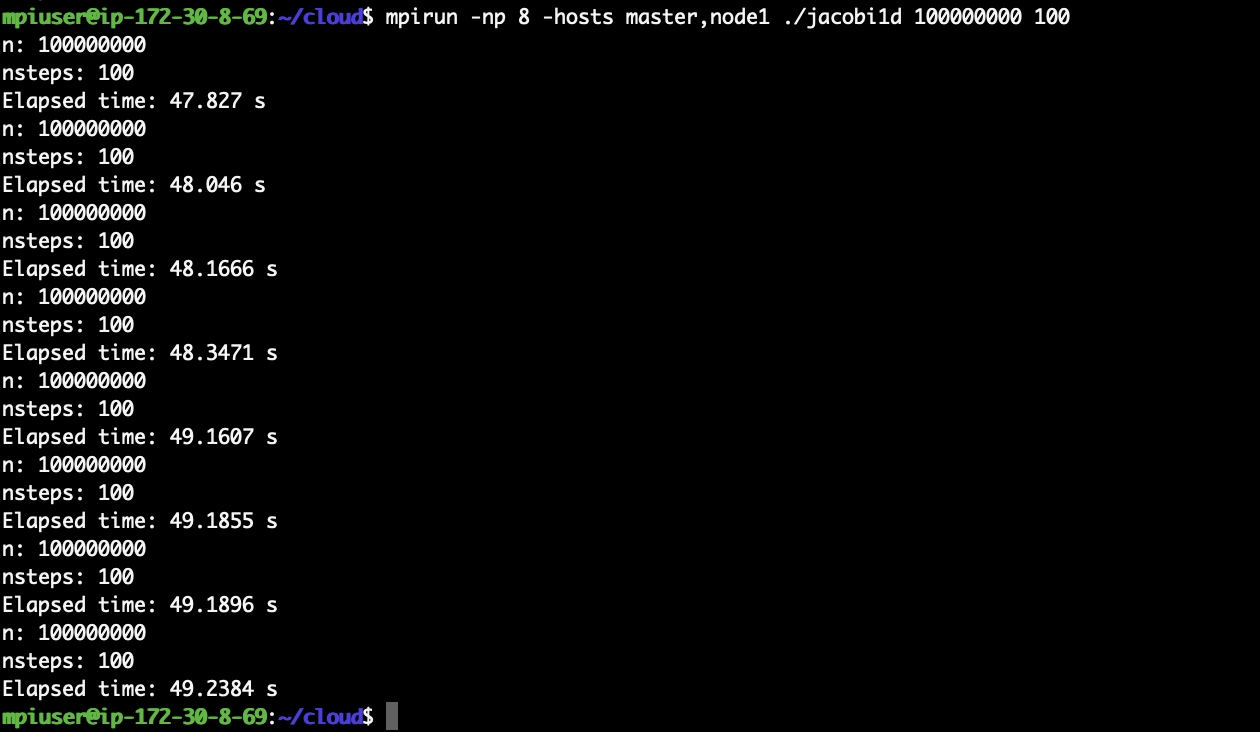